# B반 최효진 과제 2일차

## 목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를 생성하여 회귀분석을 실시하고 결과를 해석하라. (BMI 계산 시, WEIGHT는 파운드(1파운드 0.45kg), HEIGHT는 인치(1인치 2.54cm)이므로 변환하여 사용) 데이터 : 체질검사.cvs(변수 : 14, 자료 수 : 252개)
## [패키지 불러오기]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

## [체질검사의 파일 확인]

In [2]:
df_raw = pd.read_csv("/home/pirl/Downloads/체질검사.csv",engine = "python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## [df_raw에 BMI를 만들고 키와 몸무게를 이용하여 계산]

In [3]:
# df_raw['WEIGHT'] = df_raw['WEIGHT'] * 0.45
# df_raw['HEIGHT'] = df_raw['HEIGHT'] * 2.54
# df_raw['HEIGHT'] = df_raw['HEIGHT'] * 0.01
df_raw['BMI'] = df_raw['WEIGHT'] / (df_raw['HEIGHT'] ** 2)
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0.069568
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0.033093
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0.037882
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,0.034177
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,0.053467


## [회귀분석을 하기 위한 패키지 불러오기]

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

## [변수 간의 경향성 파악 - 그래프 분석]

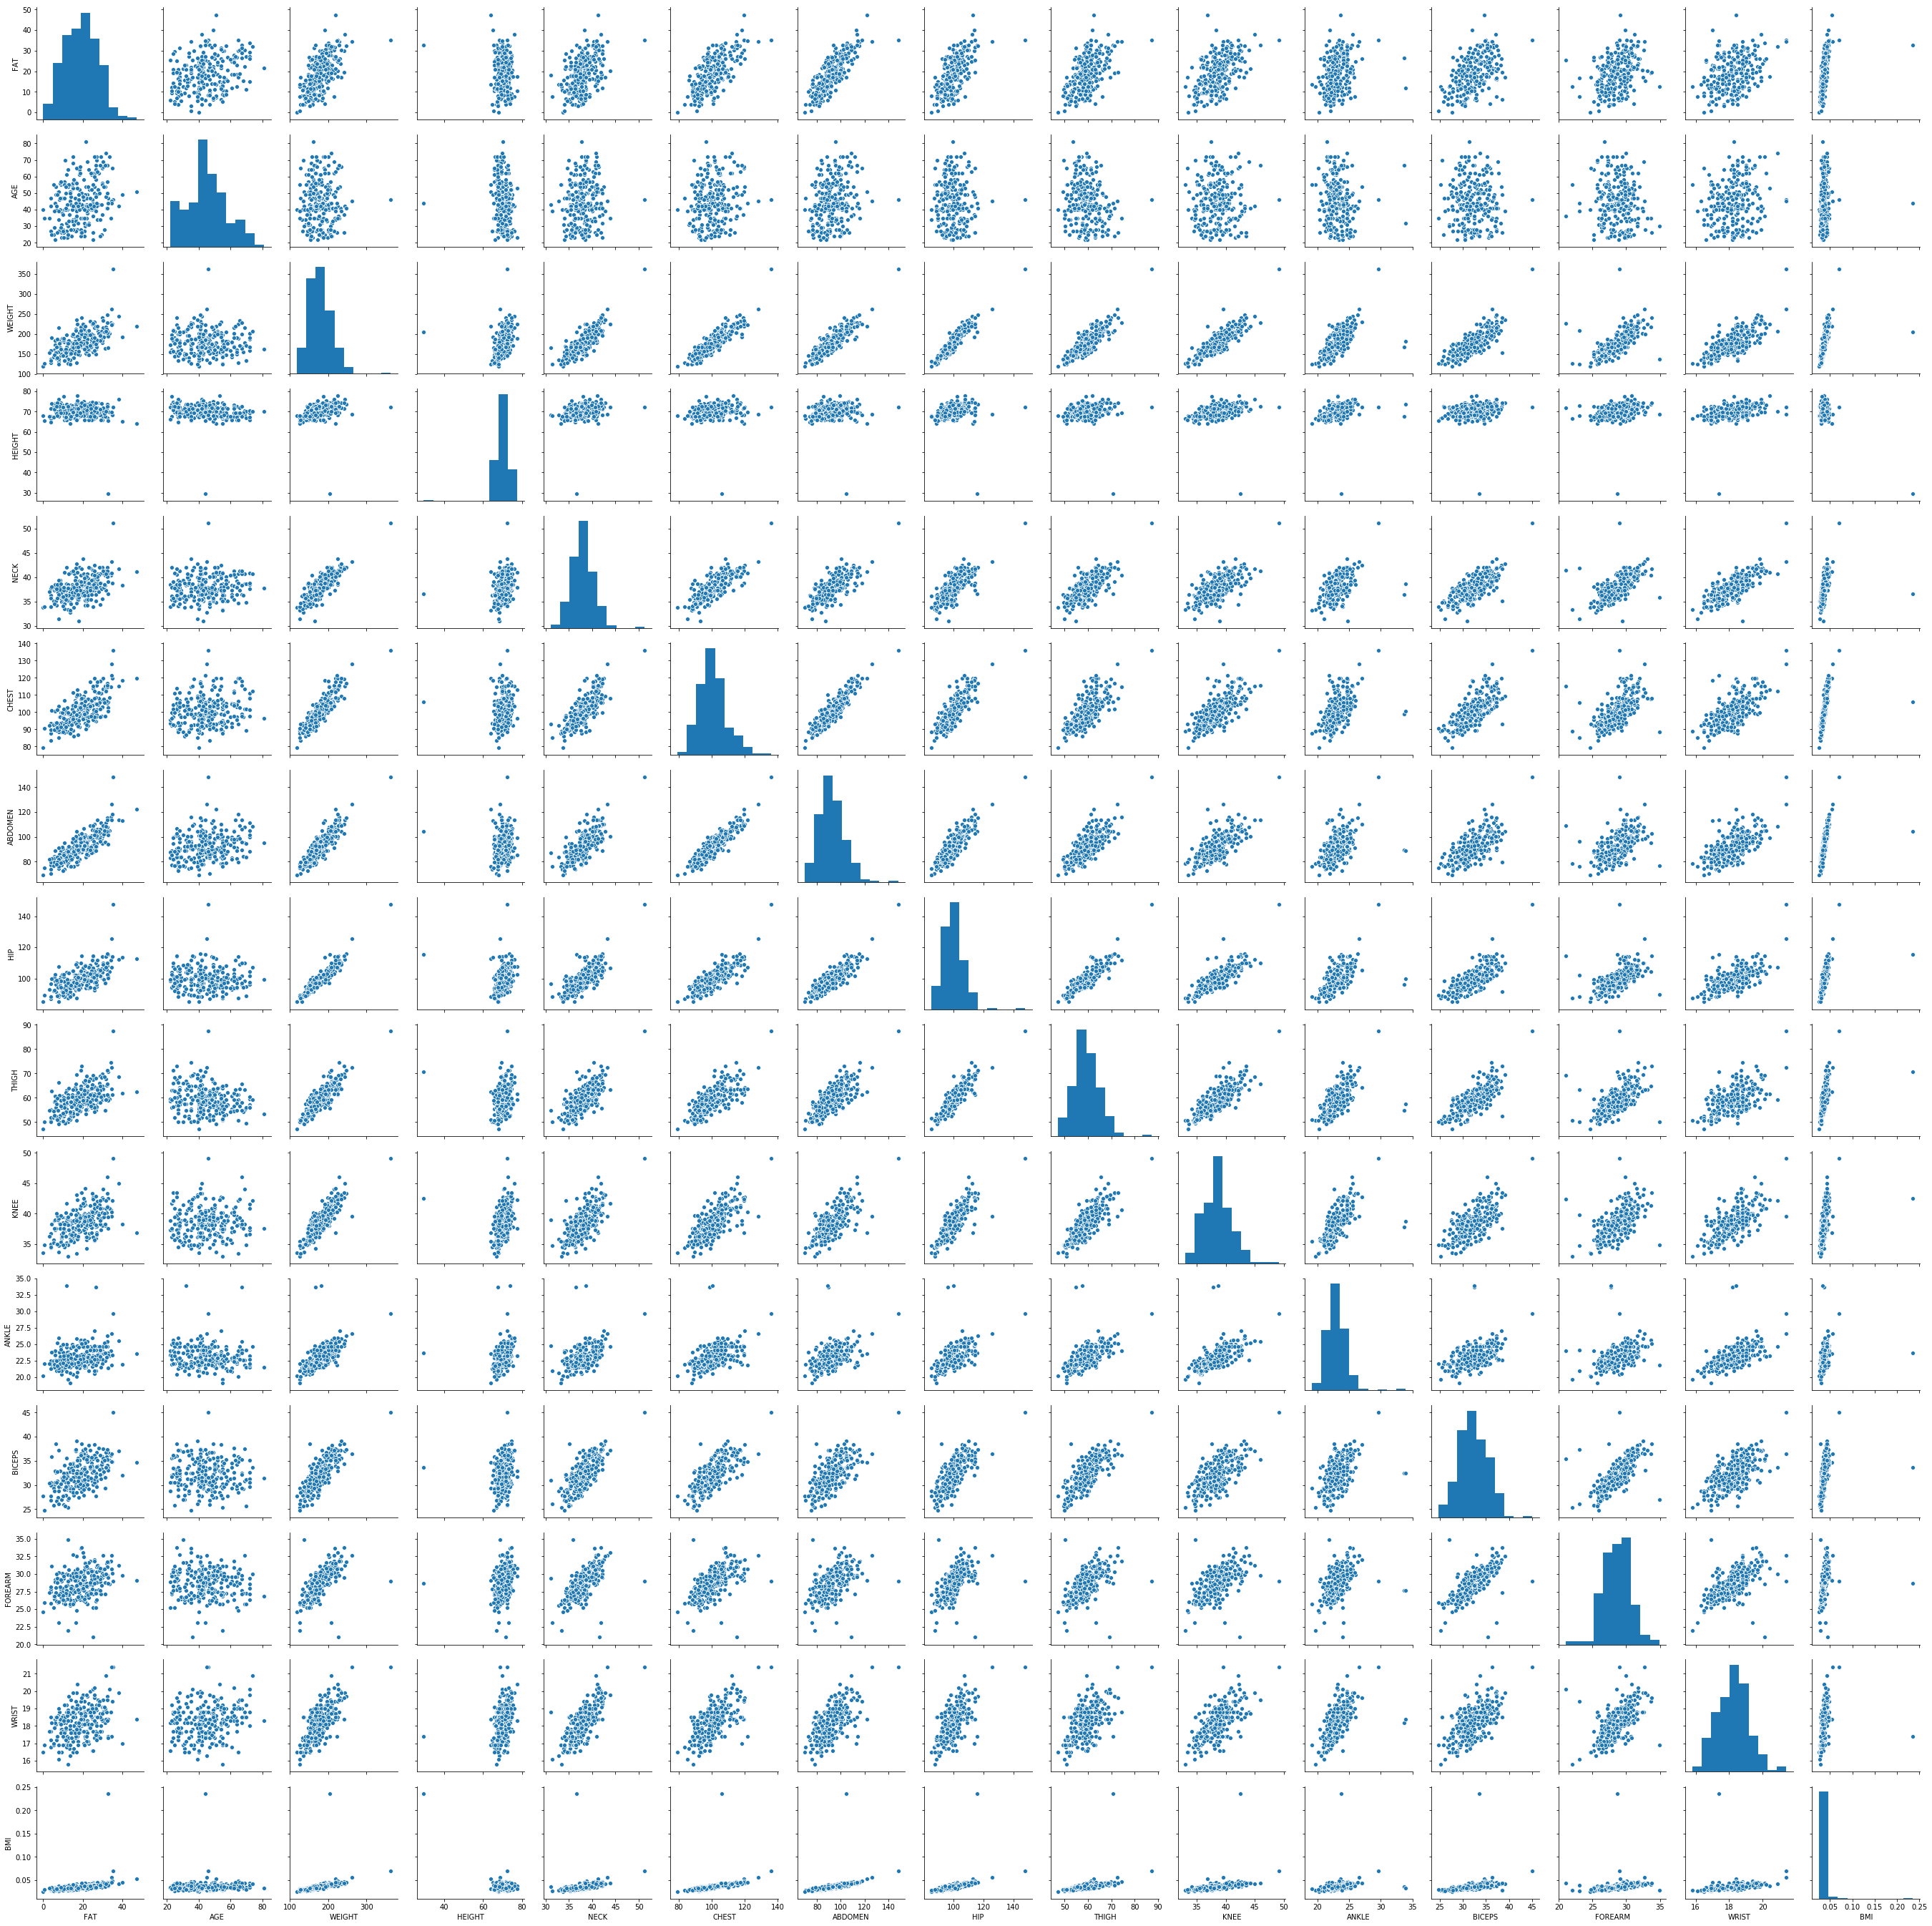

In [5]:
sns.pairplot(df_raw)

### ==> 몸무게(WEIGHT)와 선형성을 보이는 변수들이 많고, 목 둘레(NECK)와 선형성을 보이는 변수들이 많음 -> 다중공선성 확인이 필요하다

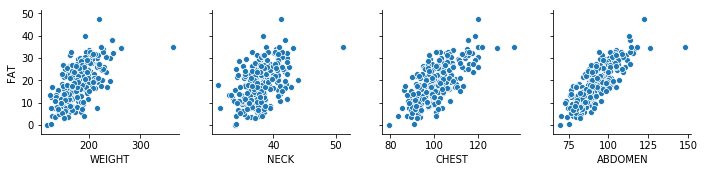

In [6]:
sns.pairplot(df_raw,y_vars = "FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"])

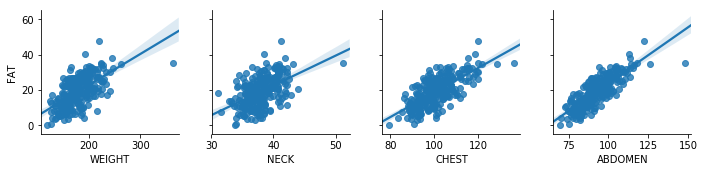

In [7]:
sns.pairplot(df_raw,y_vars = "FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"],kind="reg")

### ==> 체질 비만도(FAT)는 다수의 설명 변수와 선형관계를 보이고 있고 설명변수간 선형성과 이상치 확인됨 -> 다중공선성 확인, 이상치 처리 검토

## [변수 간의 경향성 파악 - 상관관계 분석]

In [8]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


### ==> 체질 비만도(FAT)와 가슴 둘레(CHEST), 복부 둘레(ABDOMEN) 간의 높은 선형관계 확인할 수 있으며 설명변수 간 선형관계 : 몸무게(WEIGHT)와 다른 설명변수 간의 선형관계 확인 -> 다중공선성 확인, 조치 필요
## [회귀 모델 생성]

In [9]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI",data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Thu, 02 May 2019   Prob (F-statistic):           5.49e-63
Time:                        20:05:44   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

### ==> No. Observations(분석 자료 수) : 252 , DF Residuals(잔차 자유도) : 237, DF Model(모델 자유도) : 14 
### ==> 분산 분석 결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다.
### ==> 설명력 0.749 : 모델을 통하여 설명변수 EVAL을 74.9%를 설명할 수 있다.
### ==> 회귀계수 검정 : 절편의 유의성은 검토하지 않는다. 
### ==> ABDOMEN, FOREARM, WRIST의 p값이 유의수준 0.05보다 작으므로 유의한다.

## [회귀 모델 생성 : 전체 설명변수 대상으로 다중공선성 검토]

In [10]:
df_raw_X = df_raw.drop("FAT",axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_X_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_X_const.values,i) for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


### ==> 몸무게(WEIGHT)의 VIF가 52.665로 높고 엉덩이 둘레(HIP)도 높게 나타남 -> 변수 특성, 영향을 고려하여 모델에서 제외 검토

## [회귀 모델 생성 : 다중공선성이 높은 WEIGHT 제외]

In [11]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI",data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Thu, 02 May 2019   Prob (F-statistic):           2.29e-63
Time:                        20:05:44   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

## [회귀 모델 생성 : 전체 설명변수 대상으로 다중 공선성 검토]

In [12]:
df_raw_X = df_raw.drop(["FAT" , "WEIGHT"],axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_X_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_X_const.values,i) for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


## [회귀 모델 생성 : 다중공선성이 높은 WEIGHT,HIP 제외]

In [13]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI",data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     56.85
Date:                Thu, 02 May 2019   Prob (F-statistic):           4.92e-63
Time:                        20:05:44   Log-Likelihood:                -722.44
No. Observations:                 252   AIC:                             1471.
Df Residuals:                     239   BIC:                             1517.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1864      8.866      0.923      0.3

## [회귀 모델 생성 : 전체 설명변수 대상으로 다중 공선성 검토]

In [14]:
df_raw_X = df_raw.drop(["FAT" , "WEIGHT", "HIP"],axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_X_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_X_const.values,i) for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
8,ANKLE,1.844
1,AGE,2.125
10,FOREARM,2.168
11,WRIST,3.300
9,BICEPS,3.506
3,NECK,3.958
12,BMI,4.309
2,HEIGHT,4.380
7,KNEE,4.732
6,THIGH,6.380


### ==> ABDOMEN 보면 다중공선성 문제가 해결되었다.

## [후진제거법을 이용한 변수 선택]

In [15]:
df_raw_y = df_raw["FAT"]
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 6).fit(df_raw_X, df_raw_y)
selected_cols = df_raw_X.columns[rfe.support_]
removed_cols = df_raw_X.columns[~rfe.support_]
print("Selected Varialbles : {}".format(selected_cols))
print("Removed Varialbles : {}".format(removed_cols))

Selected Varialbles : Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Varialbles : Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


## [후진제거법을 이용한 변수 선택] - 회귀 모델 생성

In [16]:
rfe_reg_model = smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + FOREARM + WRIST + BMI", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     110.6
Date:                Thu, 02 May 2019   Prob (F-statistic):           7.89e-67
Time:                        20:05:45   Log-Likelihood:                -727.33
No. Observations:                 252   AIC:                             1469.
Df Residuals:                     245   BIC:                             1493.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0818      8.088      1.865      0.0

### ==> No. Observations(분석 자료 수) : 252 , DF Residuals(잔차 자유도) : 245, DF Model(모델 자유도) : 6
### ==> 분산 분석 결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다.
### ==> 설명력 0.730 : 모델을 통하여 설명변수 EVAL을 73.0%를 설명할 수 있다.
### ==> 회귀계수 검정 : 절편의 유의성은 검토하지 않는다.
### ==> 모든 설명변수의 회귀계수 유의

## [후진제거법을 이용한 변수 선택 - 선택된 설명변수 대상으로 다중 공선성 재진단]

In [17]:
df_raw_X_rfe = df_raw_X[selected_cols]
df_raw_X_rfe_const = add_constant(df_raw_X_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_X_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_X_rfe_const.values,i) for i in range(df_raw_X_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF",inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.784
5,WRIST,2.582
3,ABDOMEN,2.710
1,HEIGHT,2.859
6,BMI,3.006
2,NECK,3.587
0,const,851.820


### ==> 변수 제거법을 이용하여 선택된 변수들 간에는 다중공선성 문제는 없다.

## [변수 중요도 확인 : 비표준화 회귀계수 기준]

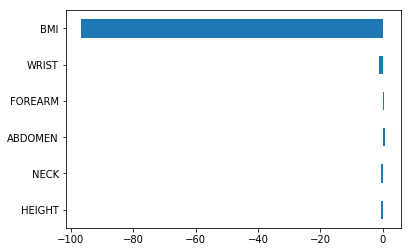

In [18]:
df_reg_coef = pd.DataFrame({"Coef" : rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef",legend = False)

## [결론도출] : 표준화 회귀계수를 이용한 변수 중요도 확인

In [19]:
scaler = StandardScaler()
cols = df_raw_X.columns

np_scaled = scaler.fit_transform(df_raw_X)
df_scaled = pd.DataFrame(np_scaled,columns = cols)

df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula =  "FAT ~ HEIGHT + NECK + ABDOMEN + KNEE + FOREARM + WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     107.3
Date:                Thu, 02 May 2019   Prob (F-statistic):           1.12e-65
Time:                        20:05:45   Log-Likelihood:                -730.08
No. Observations:                 252   AIC:                             1474.
Df Residuals:                     245   BIC:                             1499.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.280     68.360      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### ==> No. Observations(분석 자료 수) : 252 , DF Residuals(잔차 자유도) : 245, DF Model(모델 자유도) : 6
### ==> 분산 분석 결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다.
### ==> 설명력 0.724 : 모델을 통하여 설명변수 EVAL을 72.4%를 설명할 수 있다.
### ==> 회귀계수 검정 : 절편의 유의성은 검토하지 않는다.
### ==> 모든 설명변수의 회귀계수 유의

# -----------------------------------------------------------
# B반 최효진 과제 3일차-1

## 의사결정나무_예측

## 콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라. 데이터 : Concrete.csv(변수 : 9개, 자료 수 : 1,030개)
## - 목표변수(Concrete_compressive_strength)

## [패키지 불러오기]

In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

import graphviz

## [한글 포트 적용]

In [21]:
matplotlib.rc('font',family='Malgun Gothic')

## [데이터 불러오기]

In [22]:
df_raw = pd.read_csv("/home/pirl/Downloads/Concrete.csv",engine = "python")

df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1, inplace = False)
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]

## [변수 역할 지정(목표 변수, 설명 변수)] - 데이터 분할(train(0.4) : validation(0.3) : test(0.3)의 비율로 분할 

In [23]:
df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state = 1234)
print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [24]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_first_x,df_train_first_y,test_size=0.4285, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (412, 8)
train data Y size : (412,)
test data X size : (309, 8)
test data Y size : (309,)


## [기본 옵션으로 트리 생성]

In [25]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x , df_train_y)

print("Score on training set : {:3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.999827
Score on test set : 0.689095


## [현재 생성된 트리 모델의 옵션 확인]

In [26]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

## [min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능]

In [27]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

## [모델 설명력 확인]

In [28]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.689
1,2,0.984,0.688
2,3,0.962,0.688
3,4,0.948,0.718
4,5,0.918,0.681
5,6,0.908,0.678
6,7,0.889,0.679
7,8,0.876,0.671
8,9,0.862,0.659
9,10,0.857,0.663


## [모델 설명력 그래프 확인]

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


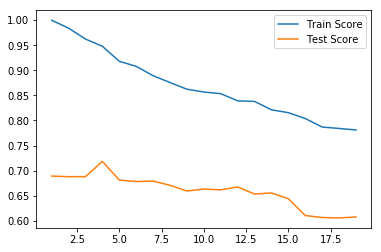

In [29]:
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label="Test Score")
plt.legend()

### ==> min_samples_leaf 가 4개 적절하므로 선택하였다.

## [잎사귀 노드의 최소 자료 수 변경과 결과]

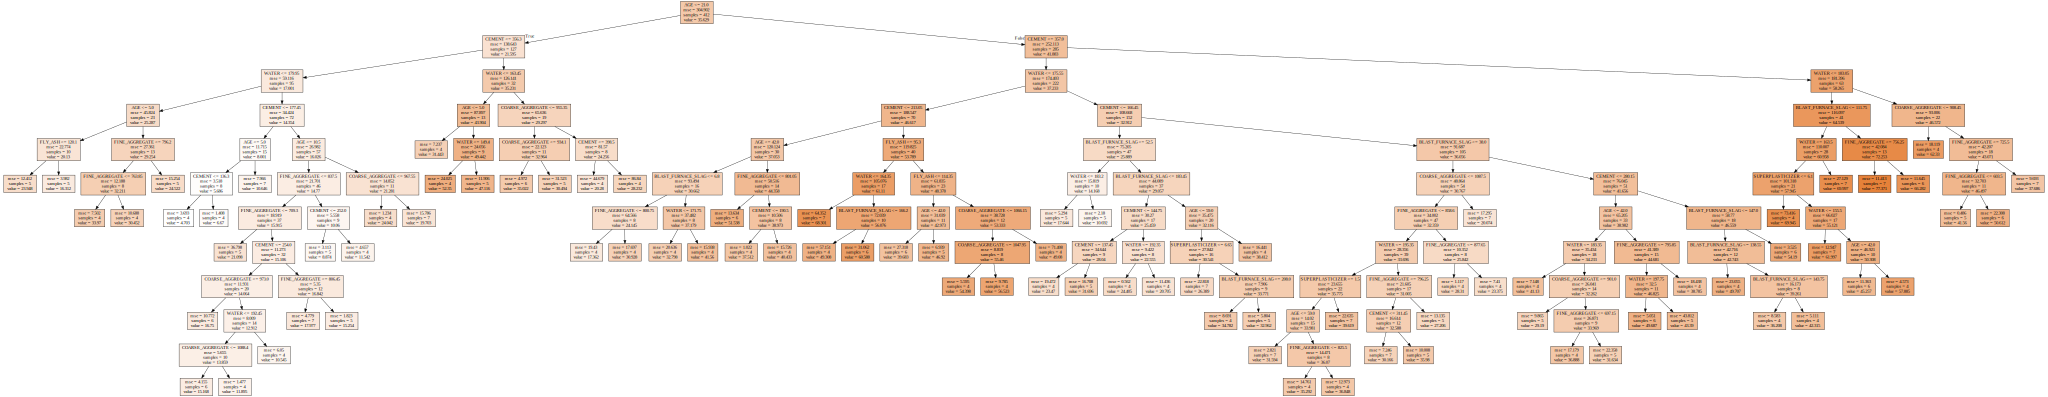

In [30]:
v_feature_names = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_names, impurity=True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## [min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능]

In [31]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 4,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.948,0.718
1,6,0.948,0.718
2,8,0.948,0.718
3,10,0.939,0.712
4,12,0.926,0.700
5,14,0.910,0.703
6,16,0.902,0.693
7,18,0.884,0.680
8,20,0.873,0.660
9,22,0.865,0.665


## [모델 설명력 확인]

In [32]:
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.948,0.718
1,6,0.948,0.718
2,8,0.948,0.718
3,10,0.939,0.712
4,12,0.926,0.700
5,14,0.910,0.703
6,16,0.902,0.693
7,18,0.884,0.680
8,20,0.873,0.660
9,22,0.865,0.665


## [모델 설명력 그래프 확인]

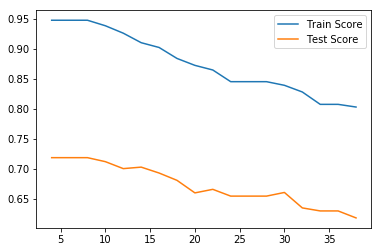

In [33]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle = "-", label="Test Score")
plt.legend()

### ==> min_samples_split는 30개 적절

## [분리 노드의 최소 자료 수 변경 결과]

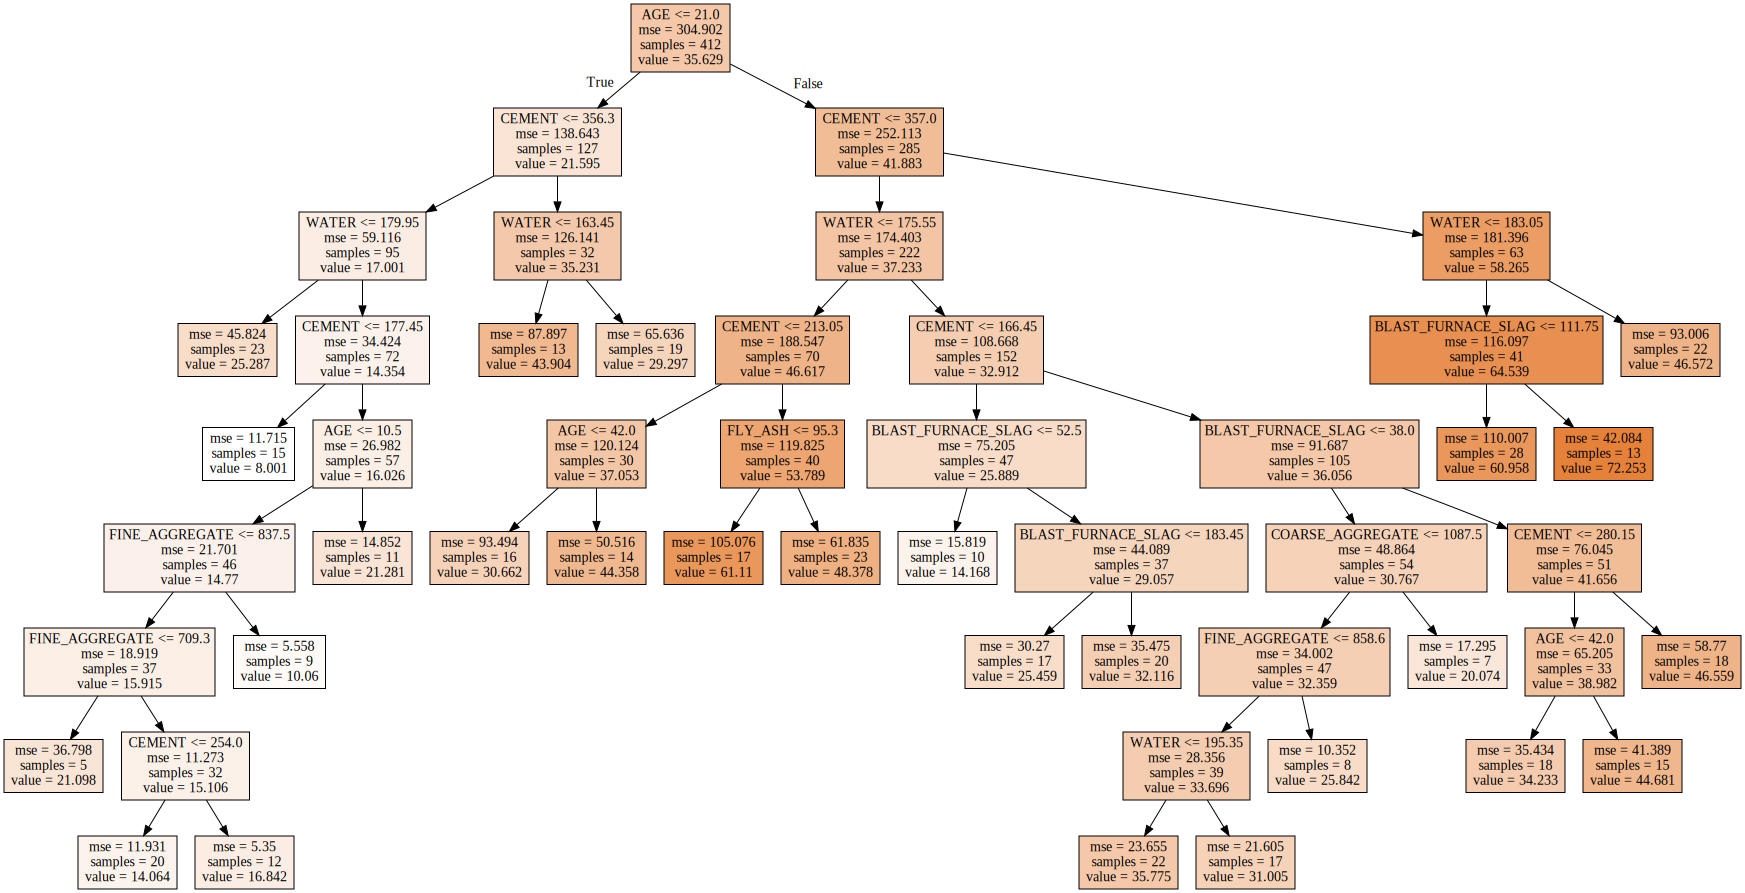

In [34]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=4, min_samples_split=30)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",feature_names = v_feature_names,impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## [max_depth : 최대 깊이 변경에 따른 모델 성능]

In [35]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 4,min_samples_split = 30, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

## [모델 설명력 확인]

In [36]:
df_score_depth.round(3)

,depth,TrainScore,TestScore
0,1,0.288,0.190
1,2,0.524,0.400
2,3,0.662,0.482
3,4,0.742,0.565
4,5,0.808,0.609
5,6,0.825,0.634
6,7,0.837,0.659
7,8,0.839,0.660
8,9,0.839,0.660
9,10,0.839,0.660


## [모델 설명력 그래프 확인]

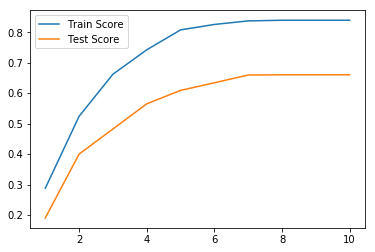

In [37]:
plt.plot(para_depth, train_score, linestyle = "-", label="Train Score")
plt.plot(para_depth, test_score, linestyle = "-", label="Test Score")
plt.legend()

### ==>max_depth가 8로 적절

## [최대 깊이 변경 결과]

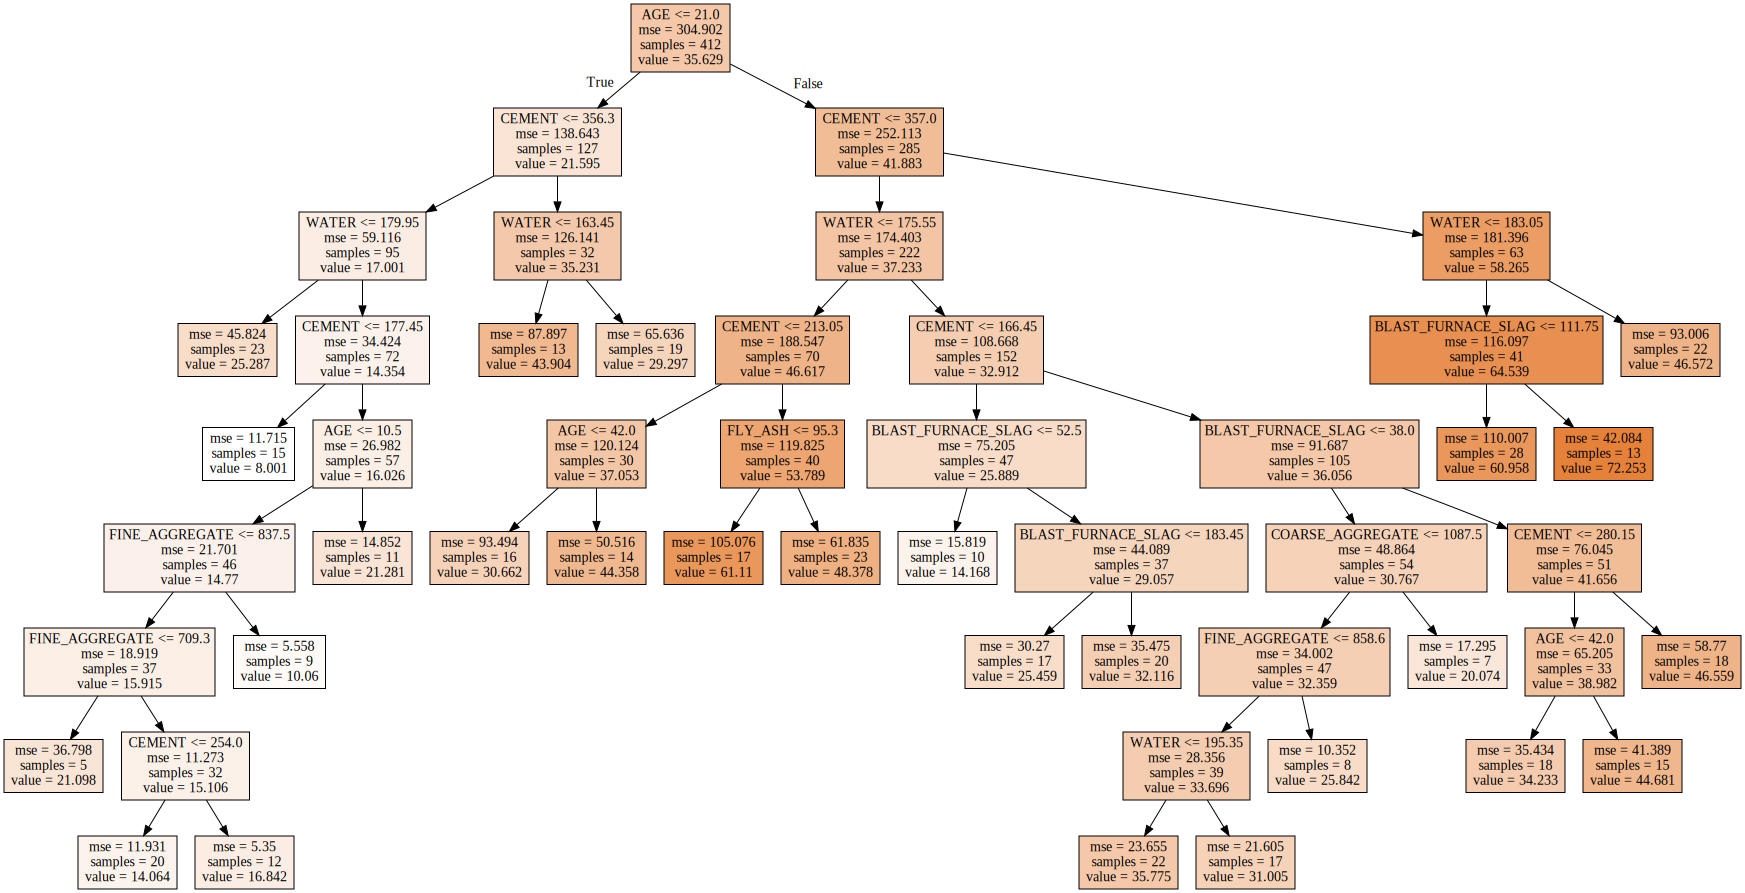

In [38]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=4, min_samples_split=30,max_depth = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot",feature_names = v_feature_names,impurity = True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

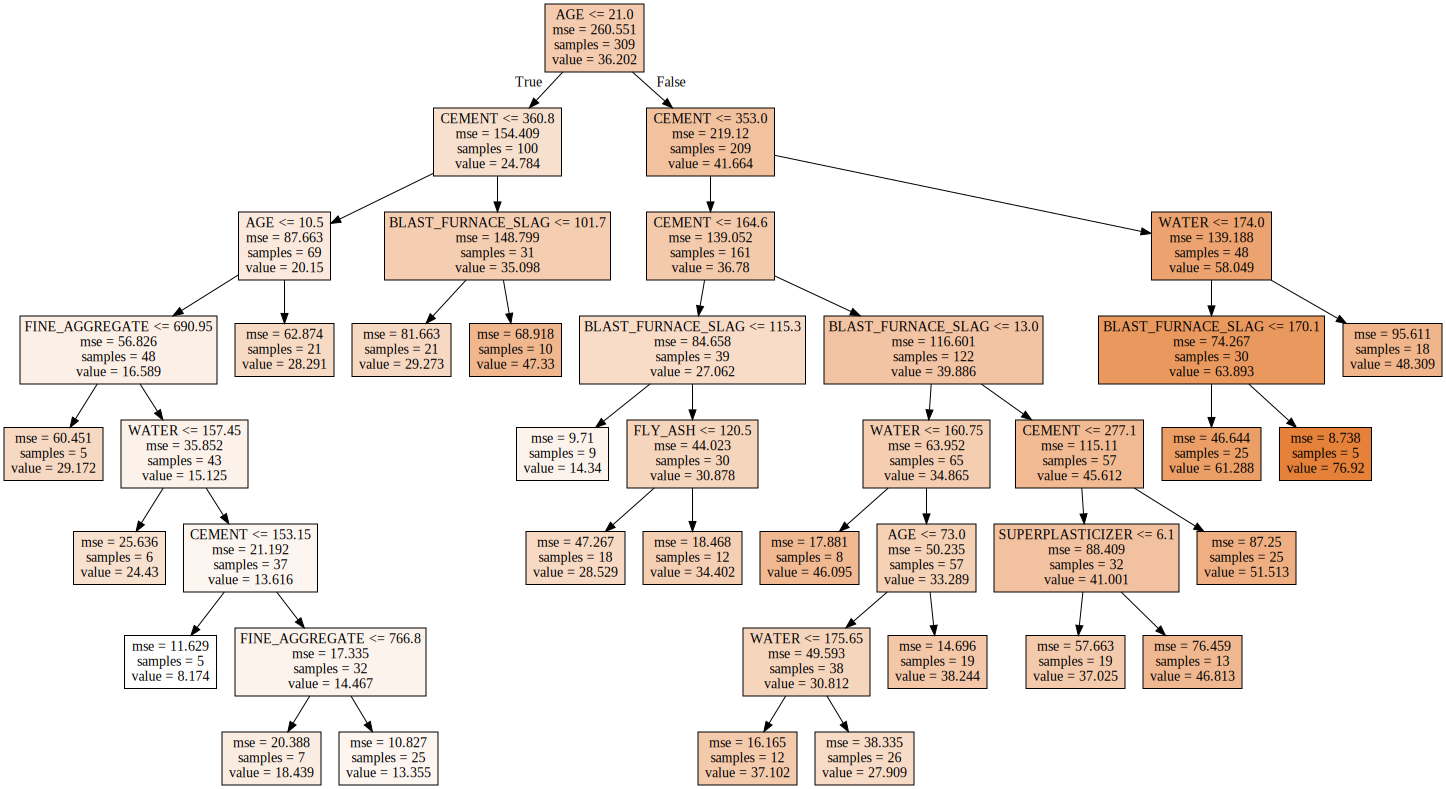

In [39]:
tree_final1 = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=4, min_samples_split=30,max_depth = 8)
tree_final1.fit(df_test_first_x, df_test_first_y)
export_graphviz(tree_final1, out_file="tree_depth.dot",feature_names = v_feature_names,impurity = True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

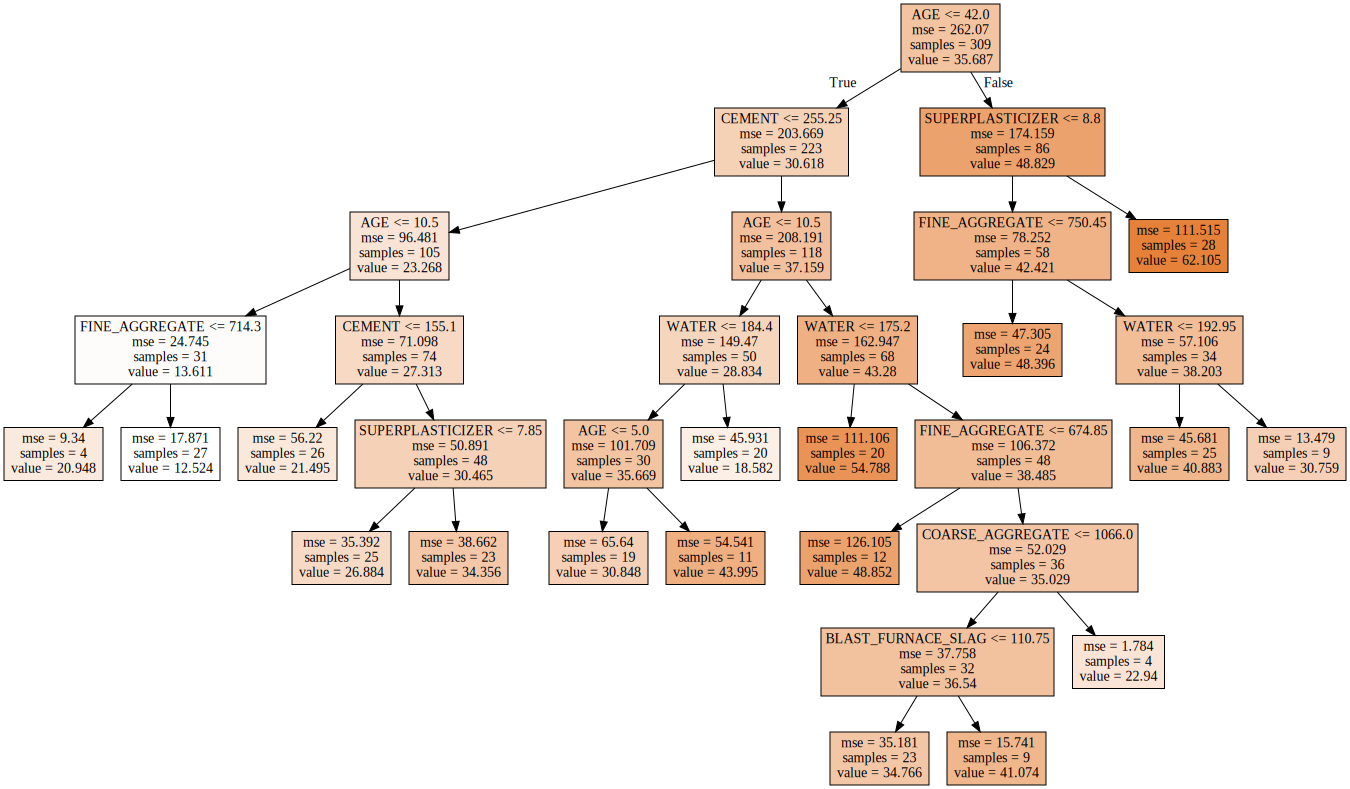

In [40]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=4, min_samples_split=30,max_depth = 8)
tree_final.fit(df_test_x, df_test_y)
export_graphviz(tree_final, out_file="tree_depth.dot",feature_names = v_feature_names,impurity = True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## [feature_importances_: 설명변수의 중요도]

In [41]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.497
0,CEMENT,0.188
4,SUPERPLASTICIZER,0.124
3,WATER,0.124
6,FINE_AGGREGATE,0.053
5,COARSE_AGGREGATE,0.010
1,BLAST_FURNACE_SLAG,0.004
2,FLY_ASH,0.000


Text(0, 0.5, '변수')

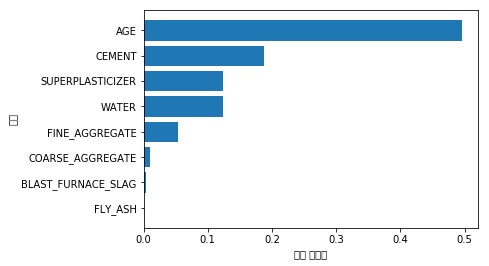

In [42]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### ==> 나이(AGE), 시멘트(CEMENT) 순으로 영향을 준다.

## [예측값 구하기]

In [43]:
pred_1 = tree_final.predict(df_test_first_x)

In [44]:
pred_1

array([12.5237037 , 18.582     , 34.76608696, 12.5237037 , 62.10464286,
       41.07444444, 26.8844    , 34.35608696, 30.84842105, 54.788     ,
       12.5237037 , 26.8844    , 48.39583333, 18.582     , 62.10464286,
       34.76608696, 30.84842105, 26.8844    , 40.8828    , 12.5237037 ,
       30.84842105, 26.8844    , 26.8844    , 21.49538462, 43.99545455,
       26.8844    , 40.8828    , 18.582     , 21.49538462, 21.49538462,
       34.35608696, 21.49538462, 41.07444444, 40.8828    , 48.39583333,
       26.8844    , 18.582     , 26.8844    , 12.5237037 , 18.582     ,
       12.5237037 , 62.10464286, 18.582     , 21.49538462, 26.8844    ,
       26.8844    , 26.8844    , 21.49538462, 43.99545455, 34.76608696,
       54.788     , 12.5237037 , 62.10464286, 54.788     , 54.788     ,
       54.788     , 40.8828    , 48.39583333, 34.35608696, 34.35608696,
       54.788     , 12.5237037 , 48.39583333, 20.9475    , 30.84842105,
       41.07444444, 62.10464286, 62.10464286, 21.49538462, 48.39

In [45]:
df_test_x_1 = pd.DataFrame(data=df_test_first_y)
df_test_x_1["CONCRETE_COMPRESSIVE_STRENGTH"] = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_test_x_1["PREDICTION"] = pred_1
df_test_x_1["DIFFERNECE"] = df_test_x_1["CONCRETE_COMPRESSIVE_STRENGTH"] - df_test_x_1["PREDICTION"]
df_test_x_1.head()

,CONCRETE_COMPRESSIVE_STRENGTH,PREDICTION,DIFFERNECE
369,15.34,12.523704,2.816296
544,14.60,18.582000,-3.982000
500,57.92,34.766087,23.153913
199,15.04,12.523704,2.516296
262,44.40,62.104643,-17.704643


## [mse,mae]

In [46]:
mse1 = mean_squared_error(df_test_x_1["CONCRETE_COMPRESSIVE_STRENGTH"], df_test_x_1["PREDICTION"])

mae1 = mean_absolute_error(df_test_x_1["CONCRETE_COMPRESSIVE_STRENGTH"], df_test_x_1["PREDICTION"])


In [47]:
mse1

100.68580286664081

In [48]:
mae1

7.722254633480947

### ==> mse를 제곱근 한 결과는 10.0342315534로 mae값인 7.722254633480947과 상이하다.




# -----------------------------------------------------------
# B반 최효진 과제 3일차-2

## 랜덤 포레스트_예측

## 콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라. 데이터 : Concrete.csv(변수 : 9개, 자료 수 : 1,030개)
## - 목표변수(Concrete_compressive_strength)

## [패키지 불러오기]

In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

## [한글 폰트 적용]

In [50]:
matplotlib.rc("font", family="NanumGothic")

## [데이터 불러오기]

In [51]:
df_raw = pd.read_csv("/home/pirl/Downloads/Concrete.csv",engine = "python")

df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1, inplace = False)
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]

## [변수 역할 지정(목표 변수, 설명 변수)] - 데이터 분할(train(0.4) : validation(0.3) : test(0.3)의 비율로 분할 

In [52]:
df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state = 1234)
print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [53]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_first_x,df_train_first_y,test_size=0.4285, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (412, 8)
train data Y size : (412,)
test data X size : (309, 8)
test data Y size : (309,)


## [n_estimators : 트리의 수 변경에 따른 모델 성능]

In [54]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


## [모델 설명력 확인]

In [55]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.975,0.793
1,20,0.979,0.809
2,30,0.981,0.809
3,40,0.982,0.815
4,50,0.982,0.813
5,60,0.982,0.816
6,70,0.982,0.817
7,80,0.982,0.815
8,90,0.982,0.819
9,100,0.982,0.820


## [모델 설명력 그래프 확인]

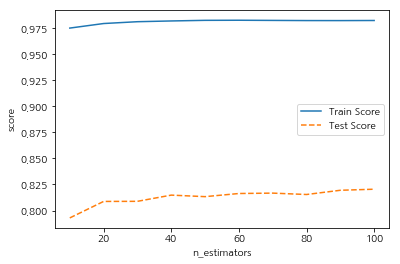

In [56]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

### ==> 트리의 수가 40개 이후로 설명력의 큰 변화를 보이지 않으나 트리 수에 의한 영향을 배제하고자 n_estimators = 80으로 지정

## [min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능]

In [57]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 80,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score


## [모델 설명력 확인]

In [58]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.982,0.815
1,2,0.969,0.806
2,3,0.951,0.799
3,4,0.936,0.786
4,5,0.921,0.775
5,6,0.908,0.764
6,7,0.894,0.751
7,8,0.881,0.744
8,9,0.869,0.735
9,10,0.860,0.727


## [모델 설명력 그래프 확인]

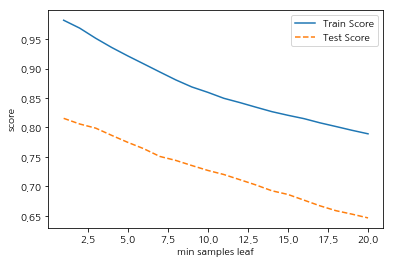

In [59]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()


### ==> min_samples_leaf는 8개가 적절하다.

## [min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능]

In [60]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 80, min_samples_leaf = 8,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


## [모델 설명력 확인]


In [61]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.881,0.744
1,6,0.881,0.744
2,8,0.881,0.744
3,10,0.881,0.744
4,12,0.881,0.744
5,14,0.881,0.744
6,16,0.881,0.744
7,18,0.875,0.738
8,20,0.869,0.735
9,22,0.863,0.730



## [모델 설명력 그래프 확인]

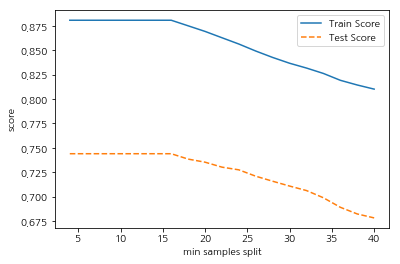

In [62]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

### ==> min_samples_split는 16개가 적절하다.

## [max_depth : 최대 깊이 변경에 따른 모델 성능]

In [63]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 80,
                               min_samples_leaf = 8, min_samples_split = 16,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

## [모델 설명력 확인]

In [64]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.431,0.306
1,2,0.647,0.502
2,3,0.756,0.619
3,4,0.827,0.693
4,5,0.863,0.726
5,6,0.877,0.739
6,7,0.880,0.743
7,8,0.881,0.744
8,9,0.881,0.744
9,10,0.881,0.744


## [모델 설명력 그래프 확인]

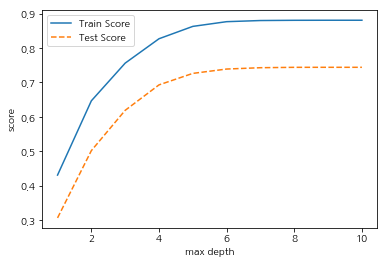

In [65]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

### ==> max_depth는 4개가 적절하다.

## [최종 모델 생성]

In [66]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 80, min_samples_leaf = 8,
                                 min_samples_split = 14, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.827
Score on test set: 0.693


In [67]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 80, min_samples_leaf = 8,
                                 min_samples_split = 14, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_first_x, df_test_first_y)))

Score on training set: 0.693
Score on test set: 0.751


### ==> 사용하지 않은 test 데이터를 사용한 회귀모델 검증
### ==> new test score가 0.751로 validation data에 대한 과체적화가 진행되지 않았음을 알 수 있다.

## [최종 선정된 모델 실행 정보]

In [68]:
rf_final

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

## [최종 모델 시각화]

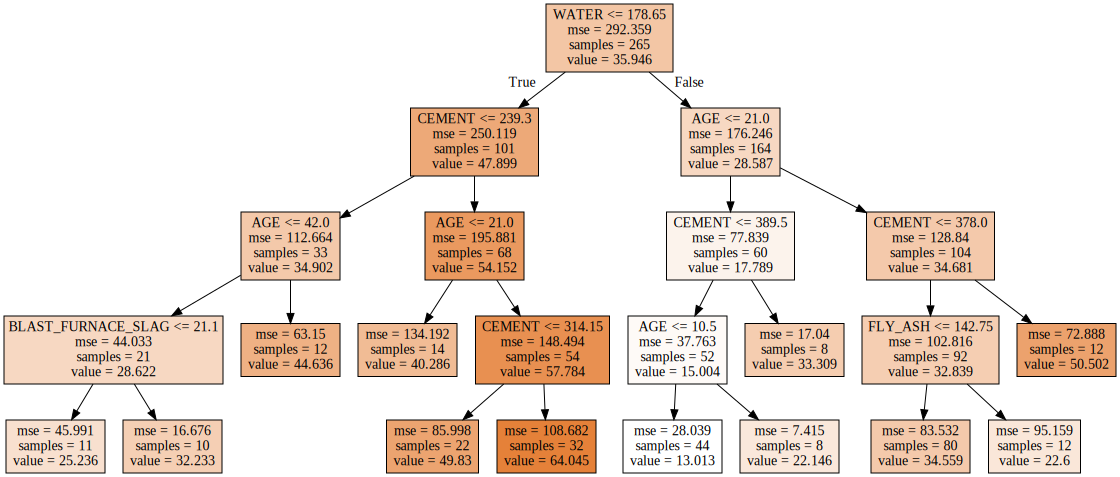

In [69]:
v_feature_names  = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_names, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


## [설명변수의 중요도 결과]

In [70]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.354
0,CEMENT,0.303
3,WATER,0.268
1,BLAST_FURNACE_SLAG,0.037
6,FINE_AGGREGATE,0.015
4,SUPERPLASTICIZER,0.013
2,FLY_ASH,0.007
5,COARSE_AGGREGATE,0.004


Text(0, 0.5, '설명변수')

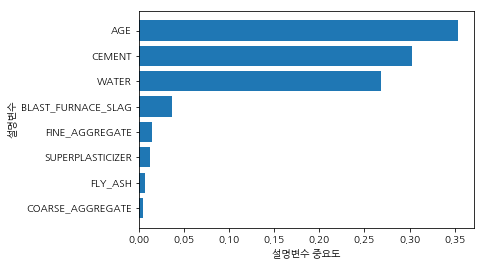

In [71]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### ==> 나이(AGE)가 가장 유의한 변수로 확인되었다.



## [예측값 구하기]

In [110]:
pred_2 = rf_final.predict(df_test_first_x)

In [111]:
pred_2

array([23.4824074 , 15.6008037 , 47.94579686, 22.46101555, 43.89103959,
       40.97926628, 35.48664577, 30.53119749, 39.42694385, 64.13761946,
       13.05175799, 30.20126221, 38.39037061, 30.18878144, 44.40771723,
       41.1232904 , 31.13661926, 24.62174803, 33.00964798, 11.14820942,
       37.60934477, 31.06512862, 35.48664577, 28.91619524, 39.51056082,
       35.46596863, 33.11752374, 27.14854392, 29.82637883, 31.00398193,
       43.48242838, 30.76968948, 36.50102719, 45.60878925, 38.19685562,
       22.20927629, 16.61230697, 35.48664577, 23.08326138, 28.73655084,
       14.85196971, 44.58962051, 31.02416428, 23.46939157, 34.95585476,
       28.58336069, 35.48664577, 27.52094077, 41.49697821, 22.95801115,
       45.58838748, 22.80954584, 49.30518899, 47.28417141, 53.0017403 ,
       61.3835906 , 35.77180565, 41.45110255, 30.6318524 , 33.41526804,
       62.13015659, 22.8587957 , 39.08247627, 15.63163516, 39.76517377,
       35.75302915, 67.95122535, 60.94496592, 30.3067346 , 37.95

In [112]:
df_test_x_2 = pd.DataFrame(data=df_test_first_y)
df_test_x_2["CONCRETE_COMPRESSIVE_STRENGTH"] = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_test_x_2["PREDICTION"] = pred_2
df_test_x_2["DIFFERNECE"] = df_test_x_2["CONCRETE_COMPRESSIVE_STRENGTH"] - df_test_x_2["PREDICTION"]
df_test_x_2.head()

,CONCRETE_COMPRESSIVE_STRENGTH,PREDICTION,DIFFERNECE
369,15.34,23.482407,-8.142407
544,14.60,15.600804,-1.000804
500,57.92,47.945797,9.974203
199,15.04,22.461016,-7.421016
262,44.40,43.891040,0.508960


## [mse,mae]

In [113]:
mse = mean_squared_error(df_test_x_2["CONCRETE_COMPRESSIVE_STRENGTH"], df_test_x_2["PREDICTION"])
mae = mean_absolute_error(df_test_x_2["CONCRETE_COMPRESSIVE_STRENGTH"], df_test_x_2["PREDICTION"])

In [114]:
mse

64.77355388338015

In [115]:
mae

6.5262213238516145

### ==> mse를 제곱근 한 결과는 8.04820190374로 mae값인 6.5262213238516145과 상이하다.


# -----------------------------------------------------------
# B반 최효진 과제 3일차-3

## 래디언트 부스팅_예측

## 콘크리트 강도를 예측하는 그래디언트 부스팅 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라. 데이터 : Concrete.csv(변수 : 9개, 자료 수 : 1,030개)
## - 목표변수(Concrete_compressive_strength)

## [패키지 불러오기]


In [78]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz

import graphviz

## [한글 폰트 적용]

In [79]:
matplotlib.rc('font',family='Malgun Gothic')

## [데이터 불러오기]

In [80]:
df_raw = pd.read_csv("/home/pirl/Downloads/Concrete.csv",engine = "python")

df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1, inplace = False)
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]

## [변수 역할 지정(목표 변수, 설명 변수)] - 데이터 분할(train(0.4) : validation(0.3) : test(0.3)의 비율로 분할 

In [81]:
df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state = 1234)
print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [82]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_first_x,df_train_first_y,test_size=0.4285, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (412, 8)
train data Y size : (412,)
test data X size : (309, 8)
test data Y size : (309,)


## [모델 생성] - 기본 옵션으로 트리 생성

In [83]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x , df_train_y)

print("Score on training set : {:3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.956918
Score on test set : 0.837452


### ==> test 데이터의 설명력이 매우 높다.

## [현재 생성된 트리 모델의 옵션 확인]

In [84]:
gb_uncustomized

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

## [모델 생성] - n_estimators : 트리의 수 변경에 따른 모델 성능

In [85]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

## [모델 설명력 확인]

In [86]:
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.666,0.565
1,20,0.827,0.718
2,30,0.885,0.781
3,40,0.911,0.804
4,50,0.926,0.814
5,60,0.936,0.823
6,70,0.943,0.830
7,80,0.948,0.833
8,90,0.953,0.837
9,100,0.957,0.837


## [모델 설명력 확인]

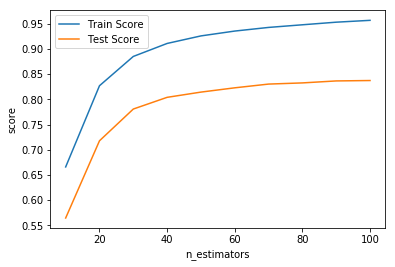

In [87]:
plt.plot(para_n_tree, train_score, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle = "-", label="Test Score")
plt.ylabel("score") 
plt.xlabel("n_estimators")
plt.legend()

### ==> tree = 50 , test score의 크기가 크면서 tree의 갯수가  과하게 크지 않은 값 50개를 최적의 값으로 결정한다.

## [min_samples_leaf : 잎사귀 노드의 자료 수 지정]

In [88]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state = 1234,n_estimators = 50, min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

## [모델 설명력 확인]

In [89]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.926,0.814
1,2,0.926,0.821
2,3,0.926,0.821
3,4,0.926,0.822
4,5,0.927,0.822
5,6,0.921,0.822
6,7,0.922,0.820
7,8,0.921,0.816
8,9,0.919,0.823
9,10,0.917,0.813


## [모델 설명력 그래프 확인]

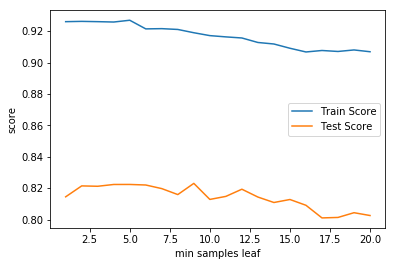

In [90]:
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label="Test Score")
plt.ylabel("score") 
plt.xlabel("min samples leaf")
plt.legend()

### ==> test score의 크기가 가장 크고, leaf의 갯수가 너무 작지 않은 9를 최적의 값으로 결정한다.

## [min_samples_split : 분할하기 위한 노드의 최소 자료 수]

In [91]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 50, min_samples_leaf = 9,min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


## [모델 설명력 확인]

In [92]:
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.919,0.823
1,4,0.919,0.823
2,6,0.919,0.823
3,8,0.919,0.823
4,10,0.919,0.823
5,12,0.919,0.823
6,14,0.919,0.823
7,16,0.919,0.823
8,18,0.919,0.823
9,20,0.917,0.822


## [모델 설명력 그래프 확인]

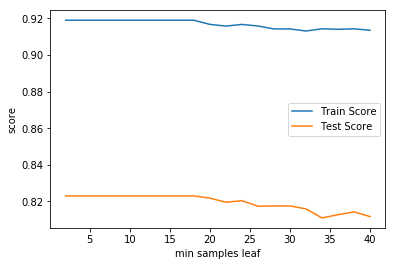

In [93]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle = "-", label="Test Score")
plt.ylabel("score") 
plt.xlabel("min samples leaf")
plt.legend()

### ==> test score가 적절한 22개를 min_samples_split으로 설정

## [max_depth : 최대 깊이 변경에 따른 설명력 변화]

In [94]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234,n_estimators = 50, min_samples_leaf = 9,min_samples_split = 22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

## [모델 설명력 확인]

In [95]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.752,0.659
1,2,0.866,0.785
2,3,0.916,0.820
3,4,0.947,0.833
4,5,0.966,0.839
5,6,0.976,0.845
6,7,0.978,0.842
7,8,0.980,0.840
8,9,0.981,0.839
9,10,0.983,0.844


## [모델 설명력 그래프 확인]

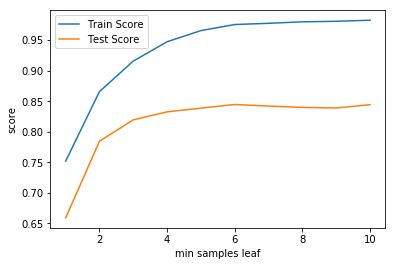

In [96]:
plt.plot(para_depth, train_score, linestyle = "-", label="Train Score")
plt.plot(para_depth, test_score, linestyle = "-", label="Test Score")
plt.ylabel("score") 
plt.xlabel("min samples leaf")
plt.legend()

### ==> 최적화 max depth =4

## [learing_rate : 학습률 변경 시 모델의 설명력 변화]

In [97]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234,n_estimators = 50, min_samples_leaf = 9,min_samples_split = 22,max_depth=4,learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

## [모델 설명력 확인]

In [98]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.947,0.833
1,0.2,0.970,0.846
2,0.3,0.977,0.846
3,0.4,0.982,0.864
4,0.5,0.988,0.862
5,0.6,0.990,0.862
6,0.7,0.990,0.864
7,0.8,0.991,0.846
8,0.9,0.993,0.817


## [모델 설명력 그래프 확인]

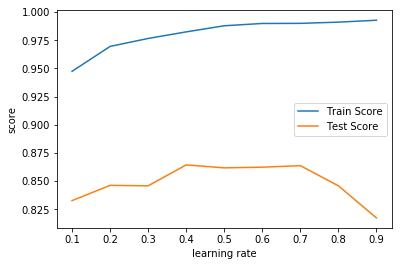

In [99]:
plt.plot(para_lr, train_score, linestyle = "-", label="Train Score")
plt.plot(para_lr, test_score, linestyle = "-", label="Test Score")
plt.ylabel("score") 
plt.xlabel("learning rate")
plt.legend()

### ==>test score의 크기가 가장 큰 값인 learning rate = 0.4를 최적의 값으로  결정한다.

In [100]:
gb_final = GradientBoostingRegressor(random_state = 1234,n_estimators = 50, min_samples_leaf = 9,min_samples_split = 22,max_depth=4,learning_rate =0.4)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))


Score on training set:0.982
Score on test set:0.864


In [101]:
gb_final = GradientBoostingRegressor(random_state = 1234,n_estimators = 50, min_samples_leaf = 9,min_samples_split = 22,max_depth=4,learning_rate =0.4)
gb_final.fit(df_train_x, df_train_y)
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))
print("Score on new test set:{:.3f}".format(gb_final.score(df_test_first_x, df_test_first_y)))


Score on test set:0.864
Score on new test set:0.876


### ==> 사용하지 않은 test 데이터를 사용한 회귀모델 검증
### ==> new test score가 0.876로 validation data에 대한 과체적화가 진행되지 않았음을 알 수 있다.

## [feature_importances_ : 설명변수의 중요도] - 결과

In [102]:
v_feature_names = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.327
0,CEMENT,0.314
3,WATER,0.188
1,BLAST_FURNACE_SLAG,0.075
4,SUPERPLASTICIZER,0.033
6,FINE_AGGREGATE,0.030
5,COARSE_AGGREGATE,0.020
2,FLY_ASH,0.013


Text(0, 0.5, 'Variables')

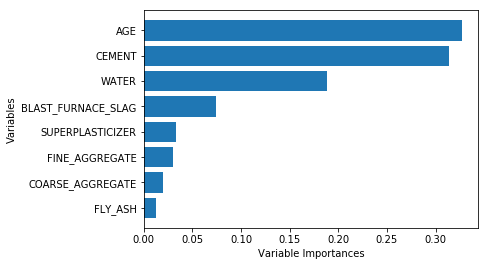

In [103]:
df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importances")
plt.ylabel("Variables")

### ==> 나이(AGE)가 가장 유의한 변수로 확인되었다.



## [예측값 구하기]

In [118]:
pred_3 = gb_final.predict(df_test_first_x)

In [119]:
pred_3

array([10.88027207, 17.08734001, 55.21902764, 15.23869046, 45.67728128,
       53.25359314, 27.360974  , 38.45941941, 28.99882093, 76.14043262,
        8.08416281, 21.56187762, 50.23343015, 38.1758915 , 39.42151886,
       40.07935465, 29.76173624, 24.06438424, 30.45167866, 13.57949226,
       39.80422941, 26.61403818, 33.09718588, 24.75241087, 50.76420541,
       38.63310109, 31.19210041, 24.91940629, 21.73455341, 23.49693048,
       36.85523466, 29.76348823, 43.86193245, 52.19093155, 48.62535109,
       32.14596423, 22.36346555, 36.88623225, 18.75652963, 32.79640812,
       13.82801213, 43.78254926, 47.858826  , 18.79847053, 32.31655399,
       27.64840251, 34.00249141, 23.72223795, 42.09121718, 20.24882837,
       45.54755381, 21.2878135 , 57.4405678 , 45.48361597, 49.97724857,
       59.94356624, 39.23564802, 52.21050593, 27.50296073, 29.8736619 ,
       68.00343651, 14.71981875, 55.01258392, 10.53998188, 35.36327364,
       37.56386867, 78.98932727, 67.36080156, 32.2000428 , 37.05

In [121]:
df_test_x_3 = pd.DataFrame(data=df_test_first_y)
df_test_x_3["CONCRETE_COMPRESSIVE_STRENGTH"] = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_test_x_3["PREDICTION"] = pred_3
df_test_x_3["DIFFERNECE"] = df_test_x_3["CONCRETE_COMPRESSIVE_STRENGTH"] - df_test_x_3["PREDICTION"]
df_test_x_3.head()

,CONCRETE_COMPRESSIVE_STRENGTH,PREDICTION,DIFFERNECE
369,15.34,10.880272,4.459728
544,14.60,17.087340,-2.487340
500,57.92,55.219028,2.700972
199,15.04,15.238690,-0.198690
262,44.40,45.677281,-1.277281


## [mse,mae]

In [122]:
mse = mean_squared_error(df_test_x_3["CONCRETE_COMPRESSIVE_STRENGTH"], df_test_x_3["PREDICTION"])
mae = mean_absolute_error(df_test_x_3["CONCRETE_COMPRESSIVE_STRENGTH"], df_test_x_3["PREDICTION"])

In [123]:
mse


32.431103348300574

In [124]:
mae

4.080403667864609

### ==> ### ==> mse를 제곱근 한 결과는 5.69483128357로 mae값인 4.080403667864609과 상이하다.
